# Pipeline for the anomaly detection on the SkAB using $T^2$ Hotelling's statistics

In [1]:
# libraries importing
import pandas as pd
from control_charts.t2 import T2
import matplotlib.pyplot as plt
%matplotlib inline
from evaluating import evaluating_change_point

## Data loading

In [2]:
# benchmark files checking
all_files=[]
import os
for root, dirs, files in os.walk("../data/"):
    for file in files:
        if file.endswith(".csv"):
             all_files.append(os.path.join(root, file))

In [3]:
# data loading
list_of_df = [pd.read_csv(file, sep=';', index_col='datetime', parse_dates=True) for file in all_files]

## Data description and visualization

In [4]:
# dataset characteristics printing
print(f'A number of datasets in the SkAB v1.0: {len(all_files)}\n')
print(f'Shape of the random dataset: {list_of_df[10].shape}\n')
n_cp = sum([len(df[df.changepoint==1.]) for df in list_of_df])
n_outlier = sum([len(df[df.anomaly==1.]) for df in list_of_df])
print(f'A number of changepoints in the SkAB v1.0: {n_cp}\n')
print(f'A number of outliers in the SkAB v1.0: {n_outlier}\n')
print(f'Head of the random dataset:')
display(list_of_df[0].head())

A number of datasets in the SkAB v1.0: 34

Shape of the random dataset: (1141, 10)

A number of changepoints in the SkAB v1.0: 130

A number of outliers in the SkAB v1.0: 13241

Head of the random dataset:


,Accelerometer1RMS,Accelerometer2RMS,Current,Pressure,Temperature,Thermocouple,Voltage,Volume Flow RateRMS,anomaly,changepoint
datetime,,,,,,,,,,
2020-03-01 16:28:16,0.080968,0.132892,2.078540,0.054711,88.8333,22.0874,248.524,75.0000,0.0,0.0
2020-03-01 16:28:17,0.080721,0.137438,0.983799,0.710565,88.9111,22.0892,226.593,75.9813,0.0,0.0
2020-03-01 16:28:18,0.081400,0.128858,1.666630,0.054711,88.8676,22.0930,216.814,75.0000,0.0,0.0
2020-03-01 16:28:19,0.080755,0.135728,1.090530,0.382638,88.8907,22.0862,230.363,75.0189,0.0,0.0
2020-03-01 16:28:20,0.080394,0.132174,1.199950,0.382638,88.9437,22.0903,251.789,75.9813,0.0,0.0


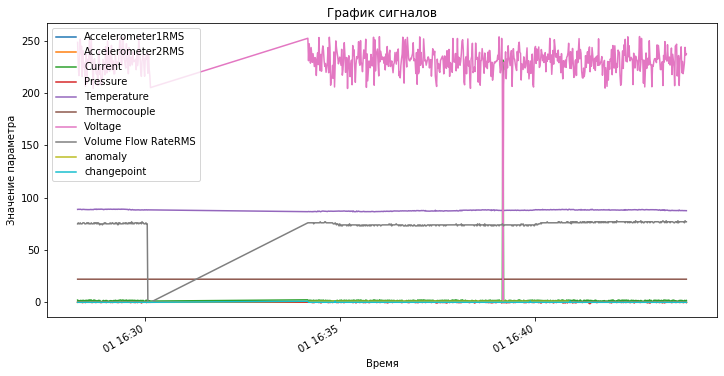

In [5]:
# random dataset visualizing
list_of_df[0].plot(figsize=(12,6))
plt.xlabel('Время')
plt.ylabel('Значение параметра')
plt.title(f'График сигналов')
plt.show()

## Labels

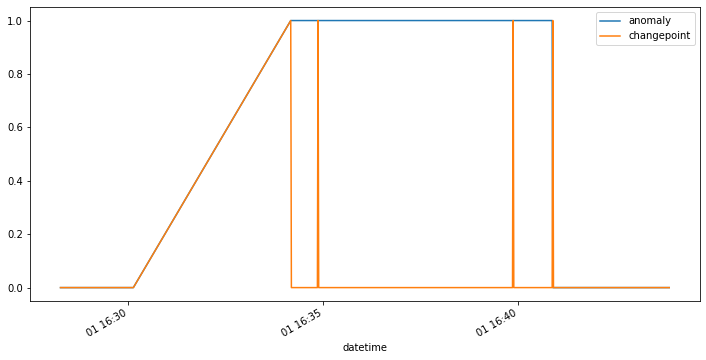

In [6]:
# plotting the labels both for outlier and changepoint detection problems
list_of_df[0].anomaly.plot(figsize=(12,6))
list_of_df[0].changepoint.plot()
plt.legend()
plt.show()

## Method applying

In [7]:
# classifier initializing
t2 = T2(scaling=True, using_PCA=False)

In [8]:
# train set selection
X_train = list_of_df[0][:'2020-03-09 12:21'].drop(['anomaly','changepoint'], axis=1)
#TODO
#TODO
#TODO
#TODO
#TODO
#TODO
#TODO
#TODO
#TODO

In [9]:
# classifier fitting
t2.fit(X_train)

In [10]:
# inference
prediction = []
for df in list_of_df:
    t2.predict(df.drop(['anomaly','changepoint'], axis=1), window_size=1, plot_fig=False)
    prediction.append(pd.Series((t2.T2>t2.T2_UCL).astype(int), 
                                index=df.index).fillna(0))

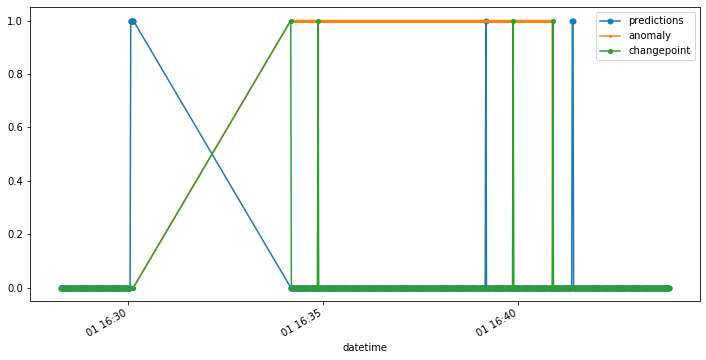

In [11]:
# true outlier indices selection
true_outlier = [df.anomaly for df in list_of_df]

# true changepoint indices selection
true_cp = [df.changepoint for df in list_of_df]

prediction[0].plot(figsize=(12,6), label='predictions', marker='o', markersize=5)
true_outlier[0].plot(marker='o', markersize=2)
true_cp[0].plot(marker='o', markersize=4)
plt.legend();

## Metrics calculation

In [12]:
# del evaluating_change_point

In [13]:
# binary classification metrics calculation
binary = evaluating_change_point(true_outlier, prediction, metric='binary', numenta_time='30 sec')

False Alarm Rate 93.48 %
Missing Alarm Rate 8.84 %


In [14]:
# average detection delay metric calculation
# Missing values means a number of not detected changepoints
add = evaluating_change_point(true_cp, prediction, metric='average_delay', numenta_time='30 sec')

Average delay 0 days 00:00:00.524590163
Missing values: 8


In [21]:
i = 5
evaluating_change_point([true_cp[i]], [prediction[i]], metric='nab', numenta_time='30 sec')
prediction[i][]

Standart  -  -887.25
LowFP  -  -1874.5
LowFN  -  -558.17


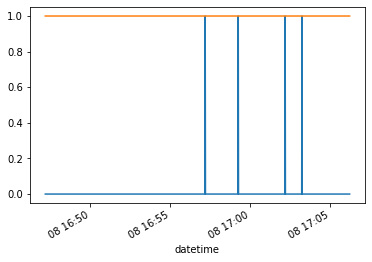

In [22]:
true_cp[i].plot()
prediction[i].plot()

In [15]:
# nab metric calculation
nab = evaluating_change_point(true_cp, prediction, metric='nab', numenta_time='30 sec')

большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
большая ширина плавного переходы сигмойды
Standart  -  -830.26
LowFP  -  -1754.24
LowFN  -  -522.23


C:\Users\V.Kozitsin\YandexDisk\papers\benchmark_git\experiments\evaluating.py:112: RuntimeWarning: divide by zero encountered in longlong_scalars
  return (A_tp-A_fp)*(1/(1+np.exp(5*y/window))) + A_fp
C:\Users\V.Kozitsin\YandexDisk\papers\benchmark_git\experiments\evaluating.py:112: RuntimeWarning: divide by zero encountered in longlong_scalars
  return (A_tp-A_fp)*(1/(1+np.exp(5*y/window))) + A_fp
C:\Users\V.Kozitsin\YandexDisk\papers\benchmark_git\experiments\evaluating.py:112: RuntimeWarning: divide by zero encountered in longlong_scalars
  return (A_tp-A_fp)*(1/(1+np.exp(5*y/window))) + A_fp


## [Additional] localization